# Capstone Project - Collision - All Years

### Applied Data Science Capstone by IBM/Coursera

## Table of Content

* Introduction
* Data Understanding
* Extract Dataset & Convert
* Methodology
* Analysis
* Result
* Conclusion

## Introduction

In an effort to reduce the frequency of car collisions in a community, an algorithim must be developed to predict the severity of an accident given the current weather, road and visibility conditions. When conditions are bad, this model will alert drivers to remind them to be more careful.


## Data Understanding

Data of road accidents recorded by Traffic Records.


This includes all types of collisions. Collisions will display at the intersection or mid-block of a segment. Timeframe: 2004 to Present.


Our predictor or target variable will be 'SEVERITYCODE' because it is used measure the severity of an accident from 0 to 5 within the dataset. Attributes used to weigh the severity of an accident are 'WEATHER', 'ROADCOND' and 'LIGHTCOND'.

0 : Little to no Probability (Clear Conditions)

1 : Very Low Probablility - Chance or Property Damage

2 : Low Probability - Chance of Injury

3 : Mild Probability - Chance of Serious Injury

4 : High Probability - Chance of Fatality

## Extract Dataset & Convert

### Loading Dataset

In [1]:
import pandas as pd
dataset = pd.read_csv("Data-Collisions.csv")
dataset.head()

C:\Users\Dexter\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [2]:
# Attributes of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [3]:
# Describing the dataset
dataset.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


### Extract & Prepare the Dataset

In [4]:
dataset = dataset[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]
dataset = dataset.astype({
    'WEATHER':'str',
    'ROADCOND':'str',
    'LIGHTCOND':'str'
})
dataset.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [5]:
# As algorithm workds on values rather than text
# Conver text to values
from sklearn.preprocessing import LabelEncoder
weatherEncoder = LabelEncoder()
roadcondEncoder = LabelEncoder()
lightcondEncoder = LabelEncoder()

dataset['WEATHER_ENC'] = weatherEncoder.fit_transform(dataset['WEATHER'])
dataset['ROADCOND_ENC'] = roadcondEncoder.fit_transform(dataset['ROADCOND'])
dataset['LIGHTCOND_ENC'] = lightcondEncoder.fit_transform(dataset['LIGHTCOND'])

dataset.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_ENC,ROADCOND_ENC,LIGHTCOND_ENC
0,2,Overcast,Wet,Daylight,4,8,5
1,1,Raining,Wet,Dark - Street Lights On,6,8,2
2,1,Overcast,Dry,Daylight,4,0,5
3,1,Clear,Dry,Daylight,1,0,5
4,2,Raining,Wet,Daylight,6,8,5


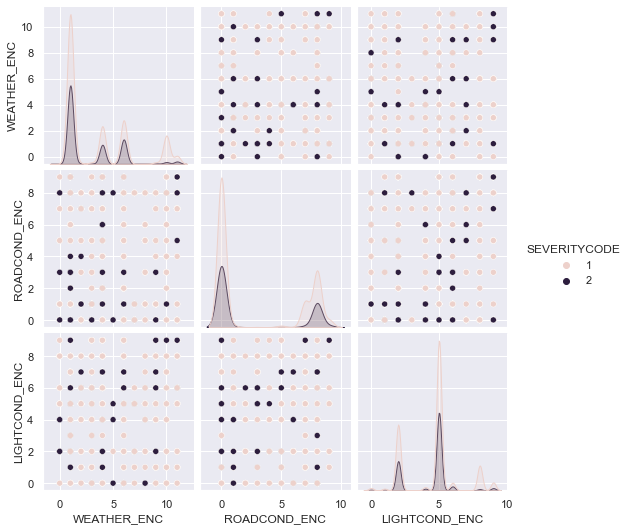

In [6]:
# Visualing the data
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pairplot(dataset[['SEVERITYCODE','WEATHER_ENC','ROADCOND_ENC','LIGHTCOND_ENC']], hue='SEVERITYCODE')

In [7]:
# Extract Features
X = dataset[['WEATHER_ENC','ROADCOND_ENC','LIGHTCOND_ENC']]
X.head()

,WEATHER_ENC,ROADCOND_ENC,LIGHTCOND_ENC
0,4,8,5
1,6,8,2
2,4,0,5
3,1,0,5
4,6,8,5


In [8]:
import numpy as np
X = np.array(X)
X

array([[4, 8, 5],
       [6, 8, 2],
       [4, 0, 5],
       ...,
       [1, 0, 5],
       [1, 0, 6],
       [1, 8, 5]])

In [9]:
# Extracting Labels
y = dataset['SEVERITYCODE']
y.head()

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

In [10]:
y = np.array(y)
y

array([2, 1, 1, ..., 2, 2, 1], dtype=int64)

## Methodology

### K-Nearest Neighbor (KNN)

KNN will help us predict the severity code of an outcome by finding the most similar to data point within k distance.

## Analysis

#### Normalize the data

In [11]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)
X

array([[ 0.22981187,  1.39847224,  0.25900713],
       [ 0.87758556,  1.39847224, -1.36653782],
       [ 0.22981187, -0.73846749,  0.25900713],
       ...,
       [-0.74184867, -0.73846749,  0.25900713],
       [-0.74184867, -0.73846749,  0.80085545],
       [-0.74184867,  1.39847224,  0.25900713]])

#### Train / Test Split

In [12]:
# Spliting data into training and testing data
from sklearn.model_selection import train_test_split

# Taking testsize as 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# Training dataset size
X_train.shape, y_train.shape

((155738, 3), (155738,))

In [14]:
# Testing Dataset size
X_test, y_test

(array([[ 2.17313294, -0.73846749,  0.25900713],
        [ 2.17313294,  1.13135478,  1.88455208],
        [-0.74184867, -0.73846749,  0.25900713],
        ...,
        [ 0.87758556,  1.39847224,  0.80085545],
        [-0.41796182, -0.73846749, -1.36653782],
        [ 0.22981187,  1.39847224,  0.25900713]]),
 array([2, 1, 1, ..., 1, 1, 1], dtype=int64))

#### K-Nearest Neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
neighbors = 5

# Build model
model = KNeighborsClassifier(n_neighbors=25)

# train model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [17]:
accuracyScore = model.score(X_test, y_test)

In [18]:
"Accuracy of KNN : {}".format(accuracyScore)

'Accuracy of KNN : 0.6978040323616284'

## Result

In [19]:
"Accuracy of KNN with 25 Neighbors : {} %".format((accuracyScore * 100))

'Accuracy of KNN with 25 Neighbors : 69.78040323616284 %'

## Conclusion

Based on historical data from weather conditions pointing to certain classes, we can conclude that particular weather conditions have a somewhat impact on whether or not travel could result in property damage (class 1) or injury (class 2).